In [1]:
%load_ext autoreload
%autoreload 2

from src.ksd.ksd import KSD
from src.ksd.kernel import IMQ, RBF

import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm, trange

from high_dim_power import (
    generate_target_proposal,
    compute_population_quantities,
    compute_ksd,
    compute_analytical_power_bounds,
    power_experiment,
)

In [2]:
tf.random.set_seed(1)

DELTA = 2.

2022-11-30 14:28:25.368509: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-30 14:28:25.368568: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: nvidia4
2022-11-30 14:28:25.368574: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: nvidia4
2022-11-30 14:28:25.368770: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 460.27.4
2022-11-30 14:28:25.368800: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 460.27.4
2022-11-30 14:28:25.368805: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 460.27.4
2022-11-30 14:28:25.369700: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in pe

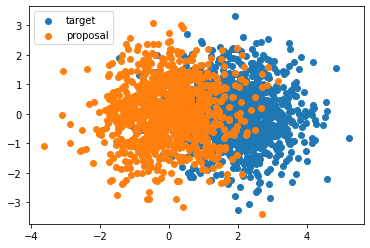

In [3]:
target, proposal = generate_target_proposal(2, DELTA)
target_x = target.sample(1000)
proposal_x = proposal.sample(1000)

fig, ax = plt.subplots()
ax.scatter(target_x[:, 0], target_x[:, 1], label="target")
ax.scatter(proposal_x[:, 0], proposal_x[:, 1], label="proposal")
ax.legend()
plt.show()

In [6]:
# dims = [1, 4, 16, 64, 256]
dims = [4, 16, 64, 128, 192, 256, 512]
res_analytical = compute_population_quantities(dims, bandwidth_order=1., kernel_class=RBF)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 41.87it/s]


In [80]:
tf.random.set_seed(2022)

# ns = [int(d) for d in dims]
ns = [500] * len(dims)

ksd_res = compute_ksd(
    ns=ns,
    dims=dims,
    nreps=100,
    kernel_class=RBF,
    bandwidth_order=1.,
)

Repetition [100/100: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [02:28<00:00, 21.18s/it]


In [84]:
gamma = 1/4.
t_ratio = 0.98

res = power_experiment(
    ksd_res,
    res_analytical,
    ns,
    dims,
    gamma,
    t_ratio,
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 15363.75it/s]


Text(0.5, 1.0, 'upper bound')

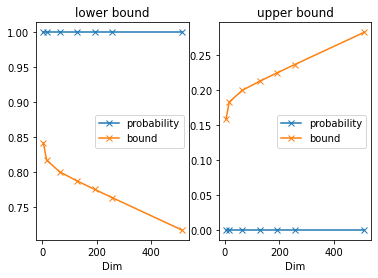

In [85]:
figs, axes = plt.subplots(nrows=1, ncols=2)

axes[0].plot(res["dim"], res["probs_l"], marker="x", label="probability")
axes[0].plot(res["dim"], res["l_bd"], marker="x", label="bound")
axes[0].set_xlabel("Dim")
axes[0].legend()
axes[0].set_title("lower bound")

axes[1].plot(res["dim"], res["probs_u"], marker="x", label="probability")
axes[1].plot(res["dim"], res["u_bd"], marker="x", label="bound")
axes[1].set_xlabel("Dim")
axes[1].legend()
axes[1].set_title("upper bound")

Text(0.5, 1.0, 'upper bound')

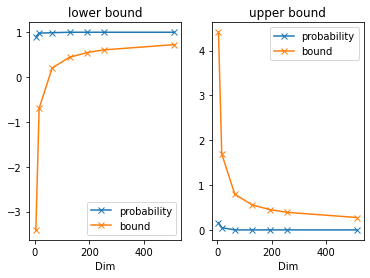

In [79]:
figs, axes = plt.subplots(nrows=1, ncols=2)

axes[0].plot(res["dim"], res["probs_l"], marker="x", label="probability")
axes[0].plot(res["dim"], res["l_bd"], marker="x", label="bound")
axes[0].set_xlabel("Dim")
axes[0].legend()
axes[0].set_title("lower bound")

axes[1].plot(res["dim"], res["probs_u"], marker="x", label="probability")
axes[1].plot(res["dim"], res["u_bd"], marker="x", label="bound")
axes[1].set_xlabel("Dim")
axes[1].legend()
axes[1].set_title("upper bound")